In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_log_error, mean_squared_error


In [2]:
train = pd.read_csv('train.csv',index_col='Id')
test = pd.read_csv('test.csv',index_col='Id')

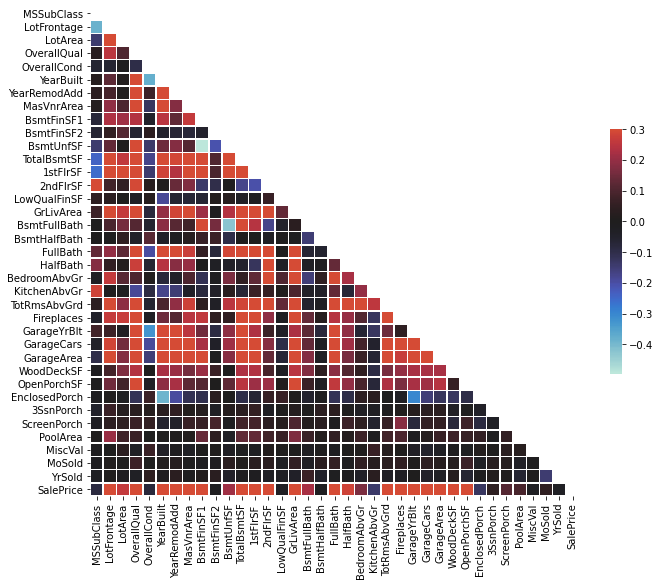

In [3]:
f, ax = plt.subplots(figsize=(11, 9))
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

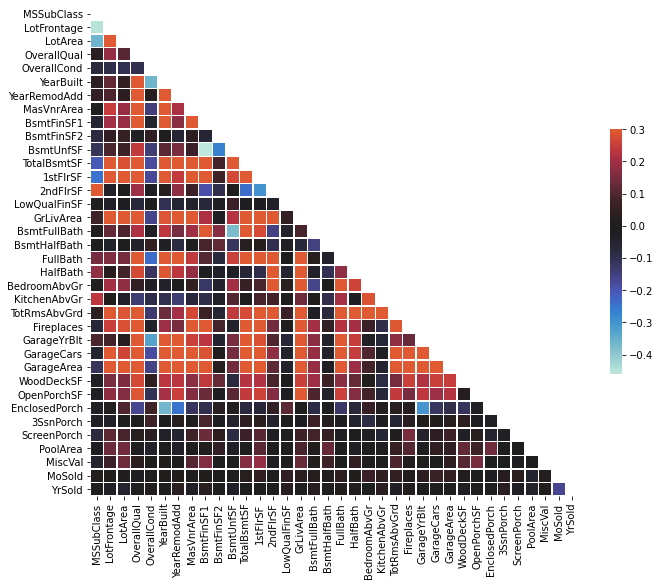

In [4]:
f, ax = plt.subplots(figsize=(11, 9))
corr = test.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [5]:
na_counts_train = train.isnull().sum()
na_counts_train[na_counts_train != 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [6]:
na_counts_test = test.isnull().sum()
na_counts_test[na_counts_test != 0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [7]:
class DataCleaner:
    
    
    def __init__(self, train, test):
        self.train = train.copy()
        self.test = test.copy()
        
    
    def cleanAlley(self):
        self.train.loc[:,'Alley'] = self.train['Alley'].fillna('No_Alley_Access')
        self.test.loc[:,'Alley'] = self.test['Alley'].fillna('No_Alley_Access')
    
    
    def cleanBsmt(self):
        self.cleanBsmtQual()
        self.cleanBsmtCond()
        self.cleanBsmtExposure()
        self.cleanBsmtFinType1()
        self.cleanBsmtFinType2()
        self.cleanBsmtFinSF1()
        self.cleanBsmtFinSF2()
        self.cleanBsmtUnfSF()
        self.cleanTotalBsmtSF()
        self.cleanBsmtFullBath()
        self.cleanBsmtHalfBath()
    
    def cleanBsmtQual(self):
        self.train.loc[:,'BsmtQual'] = self.train['BsmtQual'].fillna('No_Basement')
        self.test.loc[:,'BsmtQual'] = self.test['BsmtQual'].fillna('No_Basement')
        
        
    def cleanBsmtCond(self):
        self.train.loc[:,'BsmtCond'] = self.train['BsmtCond'].fillna('No_Basement')
        self.test.loc[:,'BsmtCond'] = self.test['BsmtCond'].fillna('No_Basement')
        
    
    def cleanBsmtExposure(self):
        self.train.loc[:,'BsmtExposure'] = self.train['BsmtExposure'].fillna('No_Basement')
        self.test.loc[:,'BsmtExposure'] = self.test['BsmtExposure'].fillna('No_Basement')
        
        
    def cleanBsmtFinType1(self):
        self.train.loc[:,'BsmtFinType1'] = self.train['BsmtFinType1'].fillna('No_Basement')
        self.test.loc[:,'BsmtFinType1'] = self.test['BsmtFinType1'].fillna('No_Basement')

        
    def cleanBsmtFinType2(self):
        self.train.loc[:,'BsmtFinType2'] = self.train['BsmtFinType2'].fillna('No_Basement')
        self.test.loc[:,'BsmtFinType2'] = self.test['BsmtFinType2'].fillna('No_Basement')
        
        
    def cleanBsmtFinSF1(self):

        self.train.loc[:,'BsmtFinSF1'] = self.train['BsmtFinSF1'].fillna('No_Basement')
        self.train['BsmtFinSF1'] = self.train['BsmtFinSF1'].astype('object')
        
        self.test.loc[:,'BsmtFinSF1'] = self.test['BsmtFinSF1'].fillna('No_Basement')
        self.test['BsmtFinSF1'] = self.test['BsmtFinSF1'].astype('object')
        

        
        self.train[(self.train['BsmtQual'] == 'No_Basement') & (self.train['BsmtCond'] == 'No_Basement')
                  & (self.train['BsmtExposure'] == 'No_Basement') & (self.train['BsmtFinType1'] == 'No_Basement')
                  & (self.train['BsmtFinType2'] == 'No_Basement') & (self.train['BsmtFinSF1'] == 0)]['BsmtFinSF1'] = 'No_Basement'
        
        self.test[(self.test['BsmtQual'] == 'No_Basement') & (self.test['BsmtCond'] == 'No_Basement')
                  & (self.test['BsmtExposure'] == 'No_Basement') & (self.test['BsmtFinType1'] == 'No_Basement')
                  & (self.test['BsmtFinType2'] == 'No_Basement') & (self.test['BsmtFinSF1'] == 0)]['BsmtFinSF1'] = 'No_Basement'
        

        print(self.test.dtypes)
        
    def cleanBsmtFinSF2(self):
        self.train.loc[:,'BsmtFinSF2'] = self.train['BsmtFinSF2'].fillna('No_Basement')
        self.train['BsmtFinSF2'] = self.train['BsmtFinSF2'].astype('object')
        
        self.test.loc[:,'BsmtFinSF2'] = self.test['BsmtFinSF2'].fillna('No_Basement')
        self.test['BsmtFinSF1'] = self.test['BsmtFinSF1'].astype('object')
        
        self.train[(self.train['BsmtQual'] == 'No_Basement') & (self.train['BsmtCond'] == 'No_Basement')
                  & (self.train['BsmtExposure'] == 'No_Basement') & (self.train['BsmtFinType1'] == 'No_Basement')
                  & (self.train['BsmtFinType2'] == 'No_Basement') & (self.train['BsmtFinSF2'] == 0)]['BsmtFinSF2'] = 'No_Basement'
        
        self.test[(self.test['BsmtQual'] == 'No_Basement') & (self.test['BsmtCond'] == 'No_Basement')
          & (self.test['BsmtExposure'] == 'No_Basement') & (self.test['BsmtFinType1'] == 'No_Basement')
          & (self.test['BsmtFinType2'] == 'No_Basement') & (self.test['BsmtFinSF2'] == 0)]['BsmtFinSF2'] = 'No_Basement'
        

    def cleanBsmtUnfSF(self):
        self.train.loc[:,'BsmtUnfSF'] = self.train['BsmtUnfSF'].fillna('No_Basement')
        self.train['BsmtUnfSF'] = self.train['BsmtUnfSF'].astype('object')
        
        self.test.loc[:,'BsmtUnfSF'] = self.test['BsmtUnfSF'].fillna('No_Basement')
        self.test['BsmtUnfSF'] = self.test['BsmtUnfSF'].astype('object')
        

        self.train[(self.train['BsmtQual'] == 'No_Basement') & (self.train['BsmtCond'] == 'No_Basement')
          & (self.train['BsmtExposure'] == 'No_Basement') & (self.train['BsmtFinType1'] == 'No_Basement')
          & (self.train['BsmtFinType2'] == 'No_Basement') & (self.train['BsmtUnfSF'] == 0)]['BsmtUnfSF'] = 'No_Basement'
        
        self.test[(self.test['BsmtQual'] == 'No_Basement') & (self.test['BsmtCond'] == 'No_Basement')
          & (self.test['BsmtExposure'] == 'No_Basement') & (self.test['BsmtFinType1'] == 'No_Basement')
          & (self.test['BsmtFinType2'] == 'No_Basement') & (self.test['BsmtUnfSF'] == 0)]['BsmtUnfSF'] = 'No_Basement'
        
        
    def cleanTotalBsmtSF(self):
        self.train.loc[:,'TotalBsmtSF'] = self.train['TotalBsmtSF'].fillna('No_Basement')
        self.train['TotalBsmtSF'] = self.train['TotalBsmtSF'].astype('object')
        
        self.test.loc[:,'TotalBsmtSF'] = self.test['TotalBsmtSF'].fillna('No_Basement')
        self.test['TotalBsmtSF'] = self.test['TotalBsmtSF'].astype('object')
        

        self.train[(self.train['BsmtQual'] == 'No_Basement') & (self.train['BsmtCond'] == 'No_Basement')
          & (self.train['BsmtExposure'] == 'No_Basement') & (self.train['BsmtFinType1'] == 'No_Basement')
          & (self.train['BsmtFinType2'] == 'No_Basement') & (self.train['TotalBsmtSF'] == 0)]['TotalBsmtSF'] = 'No_Basement'
        
        self.test[(self.test['BsmtQual'] == 'No_Basement') & (self.test['BsmtCond'] == 'No_Basement')
          & (self.test['BsmtExposure'] == 'No_Basement') & (self.test['BsmtFinType1'] == 'No_Basement')
          & (self.test['BsmtFinType2'] == 'No_Basement') & (self.test['TotalBsmtSF'] == 0)]['TotalBsmtSF'] = 'No_Basement'

        
        
    def cleanBsmtFullBath(self):
        self.train.loc[:,'BsmtFullBath'] = self.train['BsmtFullBath'].fillna('No_Basement')
        self.train['BsmtFullBath'] = self.train['BsmtFullBath'].astype('object')

        
        self.test.loc[:,'BsmtFullBath'] = self.test['BsmtFullBath'].fillna('No_Basement')
        self.test['BsmtFullBath'] = self.test['BsmtFullBath'].astype('object')
        
        
        self.train[(self.train['BsmtQual'] == 'No_Basement') & (self.train['BsmtCond'] == 'No_Basement')
          & (self.train['BsmtExposure'] == 'No_Basement') & (self.train['BsmtFinType1'] == 'No_Basement')
          & (self.train['BsmtFinType2'] == 'No_Basement') & (self.train['BsmtFullBath'] == 0)]['BsmtFullBath'] = 'No_Basement'
        
        self.test[(self.test['BsmtQual'] == 'No_Basement') & (self.test['BsmtCond'] == 'No_Basement')
          & (self.test['BsmtExposure'] == 'No_Basement') & (self.test['BsmtFinType1'] == 'No_Basement')
          & (self.test['BsmtFinType2'] == 'No_Basement') & (self.test['BsmtFullBath'] == 0)]['BsmtFullBath'] = 'No_Basement'

        
        
    def cleanBsmtHalfBath(self):
        self.train.loc[:,'BsmtHalfBath'] = self.train['BsmtHalfBath'].fillna('No_Basement')
        self.train['BsmtHalfBath'] = self.train['BsmtHalfBath'].astype('object')

        self.test.loc[:,'BsmtHalfBath'] = self.test['BsmtHalfBath'].fillna('No_Basement')
        self.test['BsmtHalfBath'] = self.test['BsmtHalfBath'].astype('object')
        
        
        self.train[(self.train['BsmtQual'] == 'No_Basement') & (self.train['BsmtCond'] == 'No_Basement')
          & (self.train['BsmtExposure'] == 'No_Basement') & (self.train['BsmtFinType1'] == 'No_Basement')
          & (self.train['BsmtFinType2'] == 'No_Basement') & (self.train['BsmtHalfBath'] == 0)]['BsmtHalfBath'] = 'No_Basement'
        
        self.test[(self.test['BsmtQual'] == 'No_Basement') & (self.test['BsmtCond'] == 'No_Basement')
          & (self.test['BsmtExposure'] == 'No_Basement') & (self.test['BsmtFinType1'] == 'No_Basement')
          & (self.test['BsmtFinType2'] == 'No_Basement') & (self.test['BsmtHalfBath'] == 0)]['BsmtHalfBath'] = 'No_Basement'
    
    
    def cleanFireplaceQu(self):
        self.train.loc[:,'FireplaceQu'] = self.train['FireplaceQu'].fillna('No_Fireplace')
        self.test.loc[:,'FireplaceQu'] = self.test['FireplaceQu'].fillna('No_Fireplace')
    
    
    def cleanGarage(self):
        self.cleanGarageType()
        self.cleanGarageYrBlt()
        self.cleanGarageFinish()
        self.cleanGarageQual()
        self.cleanGarageCond()
        self.cleanGarageCars()
        self.cleanGarageArea()
        
        
    def cleanGarageType(self):
        self.train.loc[:,'GarageType'] = self.train['GarageType'].fillna('No_Garage')
        self.test.loc[:,'GarageType'] = self.test['GarageType'].fillna('No_Garage')
        
        
    def cleanGarageYrBlt(self):
        self.train.loc[:,'GarageYrBlt'] = self.train['GarageYrBlt'].fillna('No_Garage')
        self.train['GarageYrBlt'] = self.train['GarageYrBlt'].astype('object')
        
        self.test.loc[:,'GarageYrBlt'] = self.test['GarageYrBlt'].fillna('No_Garage')
        self.test['GarageYrBlt'] = self.test['GarageYrBlt'].astype('object')
        
        
    def cleanGarageFinish(self):
        self.train.loc[:,'GarageFinish'] = self.train['GarageFinish'].fillna('No_Garage')
        self.train['GarageFinish'] = self.train['GarageFinish'].astype('object')
        
        self.test.loc[:,'GarageFinish'] = self.test['GarageFinish'].fillna('No_Garage')
        self.test['GarageFinish'] = self.test['GarageFinish'].astype('object')
        
        
    def cleanGarageQual(self):
        self.train.loc[:,'GarageQual'] = self.train['GarageQual'].fillna('No_Garage')
        self.train['GarageQual'] = self.train['GarageQual'].astype('object')
        
        self.test.loc[:,'GarageQual'] = self.test['GarageQual'].fillna('No_Garage')
        self.test['GarageQual'] = self.test['GarageQual'].astype('object')
        
          
    def cleanGarageCond(self):
        self.train.loc[:,'GarageCond'] = self.train['GarageCond'].fillna('No_Garage')
        self.train['GarageCond'] = self.train['GarageCond'].astype('object')
        
        self.test.loc[:,'GarageCond'] = self.test['GarageCond'].fillna('No_Garage')
        self.test['GarageCond'] = self.test['GarageCond'].astype('object')
        
        
    def cleanGarageCars(self):
        self.train.loc[:,'GarageCars'] = self.train['GarageCars'].fillna('No_Garage')
        self.train['GarageCars'] = self.train['GarageCars'].astype('object')
        
        self.test.loc[:,'GarageCars'] = self.test['GarageCars'].fillna('No_Garage')
        self.test['GarageCars'] = self.test['GarageCars'].astype('object')
        
        
        self.train[(self.train['GarageType'] == 'No_Garage') & (self.train['GarageYrBlt'] == 'No_Garage')
          & (self.train['GarageFinish'] == 'No_Garage') & (self.train['GarageQual'] == 'No_Garage')
          & (self.train['GarageCond'] == 'No_Garage') & (self.train['GarageCars'] == 0)]['GarageCars'] = 'No_Garage'
        
        self.test[(self.test['GarageType'] == 'No_Garage') & (self.test['GarageYrBlt'] == 'No_Garage')
          & (self.test['GarageFinish'] == 'No_Garage') & (self.test['GarageQual'] == 'No_Garage')
          & (self.test['GarageCond'] == 'No_Garage') & (self.test['GarageCars'] == 0)]['GarageCars'] = 'No_Garage'
        
        
    def cleanGarageArea(self):
        self.train.loc[:,'GarageArea'] = self.train['GarageArea'].fillna('No_Garage')
        self.train['GarageArea'] = self.train['GarageArea'].astype('object')
        
        self.test.loc[:,'GarageArea'] = self.test['GarageArea'].fillna('No_Garage')
        self.test['GarageArea'] = self.test['GarageArea'].astype('object')
        
        
        self.train[(self.train['GarageType'] == 'No_Garage') & (self.train['GarageYrBlt'] == 'No_Garage')
          & (self.train['GarageFinish'] == 'No_Garage') & (self.train['GarageQual'] == 'No_Garage')
          & (self.train['GarageCond'] == 'No_Garage') & (self.train['GarageArea'] == 0)]['GarageArea'] = 'No_Garage'
        
        self.test[(self.test['GarageType'] == 'No_Garage') & (self.test['GarageYrBlt'] == 'No_Garage')
          & (self.test['GarageFinish'] == 'No_Garage') & (self.test['GarageQual'] == 'No_Garage')
          & (self.test['GarageCond'] == 'No_Garage') & (self.test['GarageArea'] == 0)]['GarageArea'] = 'No_Garage'
        
        
    def cleanPoolQC(self):
        self.train.loc[:,'PoolQC'] = self.train['PoolQC'].fillna('No_Pool')
        self.test.loc[:,'PoolQC'] = self.test['PoolQC'].fillna('No_Pool')
    
    
    def cleanFence(self):
        self.train.loc[:,'Fence'] = self.train['Fence'].fillna('No_Fence')
        self.test.loc[:,'Fence'] = self.test['Fence'].fillna('No_Fence')

    
    def cleanMiscFeature(self):
        self.train.loc[:,'MiscFeature'] = self.train['MiscFeature'].fillna('No_Misc_Feature')
        self.test.loc[:,'MiscFeature'] = self.test['MiscFeature'].fillna('No_Misc_Feature')

    
    def cleanLotFrontage(self):
         self.imputeColumn('LotFrontage')
        
        
    def cleanElectrical(self):
        self.imputeColumn('Electrical')
        
        
    def cleanMasVnrType(self):
        self.imputeColumn('MasVnrType')
        
    
    def cleanMasVnrArea(self):
        self.imputeColumn('MasVnrArea')
        
        
    def cleanMSZoning(self):
        self.imputeColumn('MSZoning')
        
    def cleanUtilities(self):
        self.imputeColumn('Utilities')
        
        
    def cleanExterior1st(self):
        self.imputeColumn('Exterior1st')
        
    def cleanExterior2nd(self):
        self.imputeColumn('Exterior2nd')
        
    def cleanKitchenQual(self):
        self.imputeColumn('KitchenQual')
        
        
    def cleanFunctional(self):
        self.imputeColumn('Functional')
        
        
    def cleanSaleType(self):
        self.imputeColumn('SaleType')
        
        
    def imputeColumn(self, colName):
        train, test = self.dummify(colName)
        missing_train = train[train[colName].isnull()]
        train_na = train[train[colName].notnull()]
        missing_test = test[test[colName].isnull()]
        
        isMissingFeatureCol_Train = sum(missing_train.columns[missing_train.isnull().sum() != 0] != colName) == 0
        isMissingFeatureCol_Test = sum(missing_test.columns[missing_test.isnull().sum() != 0] != colName) == 0

        if (isMissingFeatureCol_Train) & (isMissingFeatureCol_Test):
            print('Dropping Rows')
            train_na = train[train[colName].notnull()]
            train_na = train_na.dropna()
            train_na_X = train_na.loc[:,train_na.columns.difference([colName,'SalePrice'])]
            train_na_y = train_na['SalePrice']
            
            missing_train = missing_train.loc[:,missing_train.columns.difference([colName, 'SalePrice'])]
            missing_test = missing_test.loc[:,missing_test.columns.difference([colName, 'SalePrice'])]
            
            if train[colName].dtypes == 'object':
                rf = RandomForestClassifier()
                rf.fit(train_na_X, train_na_y)
            else:
                rf = RandomForestRegressor()
                rf.fit(train_na_X, train_na_y)
                

            if len(missing_train) != 0:
                imputed = rf.predict(missing_train)
                m = self.train[colName].isnull()
                self.train.loc[m, colName] = imputed
                
            if len(missing_test) != 0:
                print(missing_test[missing_test.isnull().any(axis=1)])
                imputed = rf.predict(missing_test)
                m = self.test[colName].isnull()
                self.test.loc[m, colName] = imputed  
        else:
            print('DroppingCols')
            colsWithNA = train_na.columns[train_na.isnull().sum() != 0].to_list()
            colsWithNA_Missing = missing_train.columns[missing_train.isnull().sum() != 0].to_list()
            targetCols = [colName,'SalePrice']
            colsToDrop = targetCols + colsWithNA + colsWithNA_Missing

            train_na_X = train_na.loc[:,train_na.columns.difference(colsToDrop)]
            train_na_y = train_na['SalePrice']

            missing_train = missing_train.loc[:,missing_train.columns.difference(colsToDrop)]
            missing_test = missing_test.loc[:,missing_test.columns.difference(colsToDrop)]
            
            if train[colName].dtypes == 'object':
                rf = RandomForestClassifier()
                rf.fit(train_na_X, train_na_y)
            else:
                rf = RandomForestRegressor()
                rf.fit(train_na_X, train_na_y)
        
            if len(missing_train) != 0:
                imputed = rf.predict(missing_train)
                m = self.train[colName].isnull()
                self.train.loc[m, colName] = imputed
                
            if len(missing_test) != 0:
                imputed = rf.predict(missing_test)
                m = self.test[colName].isnull()
                self.test.loc[m, colName] = imputed
        
        
    '''
    def cleanAllColumns(self):
        self.cleanAlley()
        self.cleanBsmt()
        self.cleanElectrical()
        self.cleanFence()
        self.cleanFireplaceQu()
        self.cleanGarage()
        self.cleanMasVnrArea()
        self.cleanMasVnrType()
        self.cleanMiscFeature()
        self.cleanPoolQC()
        self.cleanMSZoning()
        self.cleanUtilities()
        self.cleanExterior1st()
        self.cleanExterior2nd()
        self.cleanKitchenQual()
        self.cleanFunctional()
        self.cleanSaleType()   
    '''

        
    def dummify(self, notCols):
        cat_cols = self.train.dtypes[self.train.dtypes == 'object'].index.to_list()
        
        try:
            cat_cols.remove(notCols)
        except:
            print('Column not in category cols')
        
        dum_train = pd.DataFrame()
        dum_test = pd.DataFrame()
        dummies_train = []
        dummies_test = []
        for col in cat_cols:
            dum_train = pd.get_dummies(self.train[col], prefix=f'{col}Dummy', drop_first=True)
            dum_test = pd.get_dummies(self.test[col], prefix= f'{col}Dummy', drop_first=True)
            dummies_train.append(dum_train)
            dummies_test.append(dum_test)
            
        
        concat_dummies_train = pd.concat(dummies_train, axis=1)
        train = pd.concat([self.train, concat_dummies_train], axis=1)
        train = train.drop(cat_cols, axis=1)
       
        concat_dummies_test = pd.concat(dummies_test, axis=1)
        test = pd.concat([self.test, concat_dummies_test],axis=1)
        test = test.drop(cat_cols, axis=1)
        
        missingCols = set(train.columns) - set(test.columns)
        for col in missingCols:
            if col != 'SalePrice':
                test[col] = 0
                
        
        missingCols = set(test.columns) - set(train.columns)        
        for col in missingCols:
            train[col] = 0
            

        return [train, test]
            
            
        
        

In [8]:
cleaned = DataCleaner(train, test)

In [9]:
cleaned.cleanAlley()
cleaned.cleanBsmtQual()
cleaned.cleanBsmtCond()
cleaned.cleanBsmtExposure()
cleaned.cleanBsmtFinType1()
cleaned.cleanBsmtFinType2()
cleaned.cleanBsmtFinSF1()
cleaned.cleanBsmtFinSF2()
cleaned.cleanBsmtUnfSF()
cleaned.cleanBsmtHalfBath()
cleaned.cleanBsmtFullBath()
cleaned.cleanFireplaceQu()
cleaned.cleanGarageType()
cleaned.cleanGarageYrBlt()
cleaned.cleanGarageFinish()
cleaned.cleanGarageQual()
cleaned.cleanGarageFinish()
cleaned.cleanGarageQual()
cleaned.cleanGarageCond()
cleaned.cleanGarageCars()
cleaned.cleanGarageArea()
cleaned.cleanPoolQC()
cleaned.cleanFence()
cleaned.cleanMiscFeature()

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 79, dtype: object


<ipython-input-7-84f07e151168>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.train[(self.train['BsmtQual'] == 'No_Basement') & (self.train['BsmtCond'] == 'No_Basement')
<ipython-input-7-84f07e151168>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.test[(self.test['BsmtQual'] == 'No_Basement') & (self.test['BsmtCond'] == 'No_Basement')
<ipython-input-7-84f07e151168>:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [10]:
test = cleaned.dummify('')
test[0]

Column not in category cols


MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
Id                                                                            
1             60         65.0     8450            7            5       2003   
2             20         80.0     9600            6            8       1976   
3             60         68.0    11250            7            5       2001   
4             70         60.0     9550            7            5       1915   
5             60         84.0    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
1456          60         62.0     7917            6            5       1999   
1457          20         85.0    13175            6            6       1978   
1458          70         66.0     9042            7            9       1941   
1459          20         68.0     9717            5            6       1950   
1460          20         75.0     9937            5            6       1965   

      YearRemodAdd  MasVnrArea  TotalBsmtSF  1stFlrSF  ...  \
Id                                                     ...   
1             2003       196.0          856       856  ...   
2             1976         0.0         1262      1262  ...   
3             2002       162.0          920       920  ...   
4             1970         0.0          756       961  ...   
5             2000       350.0         1145      1145  ...   
...            ...         ...          ...       ...  ...   
1456          2000         0.0          953       953  ...   
1457          1988       119.0         1542      2073  ...   
1458          2006         0.0         1152      1188  ...   
1459          1996         0.0         1078      1078  ...   
1460          1965         0.0         1256      1256  ...   

      BsmtFinSF1Dummy_910.0  BsmtUnfSFDummy_763.0  BsmtFinSF2Dummy_1073.0  \
Id                                                                          
1                         0                     0                       0   
2                         0                     0                       0   
3                         0                     0                       0   
4                         0                     0                       0   
5                         0                     0                       0   
...                     ...                   ...                     ...   
1456                      0                     0                       0   
1457                      0                     0                       0   
1458                      0                     0                       0   
1459                      0                     0                       0   
1460                      0                     0                       0   

      BsmtUnfSFDummy_1503.0  BsmtFinSF2Dummy_982.0  BsmtFinSF1Dummy_962.0  \
Id                                                                          
1                         0                      0                      0   
2                         0                      0                      0   
3                         0                      0                      0   
4                         0                      0                      0   
5                         0                      0                      0   
...                     ...                    ...                    ...   
1456                      0                      0                      0   
1457                      0                      0                      0   
1458                      0                      0                      0   
1459                      0                      0                      0   
1460                      0                      0                      0   

      GarageAreaDummy_513.0  BsmtFinSF1Dummy_769.0  BsmtUnfSFDummy_451.0  \
Id                                                                         
1              

In [11]:
cleaned.cleanElectrical()

Dropping Rows


In [12]:
cleaned.cleanMSZoning()

DroppingCols


In [13]:
cleaned.cleanUtilities()

DroppingCols


In [14]:
cleaned.cleanExterior1st()

Dropping Rows
Empty DataFrame
Columns: [1stFlrSF, 2ndFlrSF, 3SsnPorch, AlleyDummy_No_Alley_Access, AlleyDummy_Pave, BedroomAbvGr, BldgTypeDummy_2fmCon, BldgTypeDummy_Duplex, BldgTypeDummy_Twnhs, BldgTypeDummy_TwnhsE, BsmtCondDummy_Gd, BsmtCondDummy_No_Basement, BsmtCondDummy_Po, BsmtCondDummy_TA, BsmtExposureDummy_Gd, BsmtExposureDummy_Mn, BsmtExposureDummy_No, BsmtExposureDummy_No_Basement, BsmtFinSF1Dummy_100.0, BsmtFinSF1Dummy_1000, BsmtFinSF1Dummy_1000.0, BsmtFinSF1Dummy_1001.0, BsmtFinSF1Dummy_1002, BsmtFinSF1Dummy_1003, BsmtFinSF1Dummy_1004, BsmtFinSF1Dummy_1004.0, BsmtFinSF1Dummy_1005, BsmtFinSF1Dummy_1005.0, BsmtFinSF1Dummy_1010.0, BsmtFinSF1Dummy_1011.0, BsmtFinSF1Dummy_1012, BsmtFinSF1Dummy_1012.0, BsmtFinSF1Dummy_1013, BsmtFinSF1Dummy_1014, BsmtFinSF1Dummy_1015.0, BsmtFinSF1Dummy_1016, BsmtFinSF1Dummy_1018, BsmtFinSF1Dummy_1018.0, BsmtFinSF1Dummy_1021.0, BsmtFinSF1Dummy_1022, BsmtFinSF1Dummy_1023.0, BsmtFinSF1Dummy_1024, BsmtFinSF1Dummy_1026.0, BsmtFinSF1Dummy_1027.0, BsmtFi

In [15]:
cleaned.cleanExterior2nd()

Dropping Rows
Empty DataFrame
Columns: [1stFlrSF, 2ndFlrSF, 3SsnPorch, AlleyDummy_No_Alley_Access, AlleyDummy_Pave, BedroomAbvGr, BldgTypeDummy_2fmCon, BldgTypeDummy_Duplex, BldgTypeDummy_Twnhs, BldgTypeDummy_TwnhsE, BsmtCondDummy_Gd, BsmtCondDummy_No_Basement, BsmtCondDummy_Po, BsmtCondDummy_TA, BsmtExposureDummy_Gd, BsmtExposureDummy_Mn, BsmtExposureDummy_No, BsmtExposureDummy_No_Basement, BsmtFinSF1Dummy_100.0, BsmtFinSF1Dummy_1000, BsmtFinSF1Dummy_1000.0, BsmtFinSF1Dummy_1001.0, BsmtFinSF1Dummy_1002, BsmtFinSF1Dummy_1003, BsmtFinSF1Dummy_1004, BsmtFinSF1Dummy_1004.0, BsmtFinSF1Dummy_1005, BsmtFinSF1Dummy_1005.0, BsmtFinSF1Dummy_1010.0, BsmtFinSF1Dummy_1011.0, BsmtFinSF1Dummy_1012, BsmtFinSF1Dummy_1012.0, BsmtFinSF1Dummy_1013, BsmtFinSF1Dummy_1014, BsmtFinSF1Dummy_1015.0, BsmtFinSF1Dummy_1016, BsmtFinSF1Dummy_1018, BsmtFinSF1Dummy_1018.0, BsmtFinSF1Dummy_1021.0, BsmtFinSF1Dummy_1022, BsmtFinSF1Dummy_1023.0, BsmtFinSF1Dummy_1024, BsmtFinSF1Dummy_1026.0, BsmtFinSF1Dummy_1027.0, BsmtFi

In [16]:
cleaned.cleanKitchenQual()

Dropping Rows
Empty DataFrame
Columns: [1stFlrSF, 2ndFlrSF, 3SsnPorch, AlleyDummy_No_Alley_Access, AlleyDummy_Pave, BedroomAbvGr, BldgTypeDummy_2fmCon, BldgTypeDummy_Duplex, BldgTypeDummy_Twnhs, BldgTypeDummy_TwnhsE, BsmtCondDummy_Gd, BsmtCondDummy_No_Basement, BsmtCondDummy_Po, BsmtCondDummy_TA, BsmtExposureDummy_Gd, BsmtExposureDummy_Mn, BsmtExposureDummy_No, BsmtExposureDummy_No_Basement, BsmtFinSF1Dummy_100.0, BsmtFinSF1Dummy_1000, BsmtFinSF1Dummy_1000.0, BsmtFinSF1Dummy_1001.0, BsmtFinSF1Dummy_1002, BsmtFinSF1Dummy_1003, BsmtFinSF1Dummy_1004, BsmtFinSF1Dummy_1004.0, BsmtFinSF1Dummy_1005, BsmtFinSF1Dummy_1005.0, BsmtFinSF1Dummy_1010.0, BsmtFinSF1Dummy_1011.0, BsmtFinSF1Dummy_1012, BsmtFinSF1Dummy_1012.0, BsmtFinSF1Dummy_1013, BsmtFinSF1Dummy_1014, BsmtFinSF1Dummy_1015.0, BsmtFinSF1Dummy_1016, BsmtFinSF1Dummy_1018, BsmtFinSF1Dummy_1018.0, BsmtFinSF1Dummy_1021.0, BsmtFinSF1Dummy_1022, BsmtFinSF1Dummy_1023.0, BsmtFinSF1Dummy_1024, BsmtFinSF1Dummy_1026.0, BsmtFinSF1Dummy_1027.0, BsmtFi

In [17]:
cleaned.cleanFunctional()

Dropping Rows
Empty DataFrame
Columns: [1stFlrSF, 2ndFlrSF, 3SsnPorch, AlleyDummy_No_Alley_Access, AlleyDummy_Pave, BedroomAbvGr, BldgTypeDummy_2fmCon, BldgTypeDummy_Duplex, BldgTypeDummy_Twnhs, BldgTypeDummy_TwnhsE, BsmtCondDummy_Gd, BsmtCondDummy_No_Basement, BsmtCondDummy_Po, BsmtCondDummy_TA, BsmtExposureDummy_Gd, BsmtExposureDummy_Mn, BsmtExposureDummy_No, BsmtExposureDummy_No_Basement, BsmtFinSF1Dummy_100.0, BsmtFinSF1Dummy_1000, BsmtFinSF1Dummy_1000.0, BsmtFinSF1Dummy_1001.0, BsmtFinSF1Dummy_1002, BsmtFinSF1Dummy_1003, BsmtFinSF1Dummy_1004, BsmtFinSF1Dummy_1004.0, BsmtFinSF1Dummy_1005, BsmtFinSF1Dummy_1005.0, BsmtFinSF1Dummy_1010.0, BsmtFinSF1Dummy_1011.0, BsmtFinSF1Dummy_1012, BsmtFinSF1Dummy_1012.0, BsmtFinSF1Dummy_1013, BsmtFinSF1Dummy_1014, BsmtFinSF1Dummy_1015.0, BsmtFinSF1Dummy_1016, BsmtFinSF1Dummy_1018, BsmtFinSF1Dummy_1018.0, BsmtFinSF1Dummy_1021.0, BsmtFinSF1Dummy_1022, BsmtFinSF1Dummy_1023.0, BsmtFinSF1Dummy_1024, BsmtFinSF1Dummy_1026.0, BsmtFinSF1Dummy_1027.0, BsmtFi

In [18]:
cleaned.cleanSaleType()

Dropping Rows
Empty DataFrame
Columns: [1stFlrSF, 2ndFlrSF, 3SsnPorch, AlleyDummy_No_Alley_Access, AlleyDummy_Pave, BedroomAbvGr, BldgTypeDummy_2fmCon, BldgTypeDummy_Duplex, BldgTypeDummy_Twnhs, BldgTypeDummy_TwnhsE, BsmtCondDummy_Gd, BsmtCondDummy_No_Basement, BsmtCondDummy_Po, BsmtCondDummy_TA, BsmtExposureDummy_Gd, BsmtExposureDummy_Mn, BsmtExposureDummy_No, BsmtExposureDummy_No_Basement, BsmtFinSF1Dummy_100.0, BsmtFinSF1Dummy_1000, BsmtFinSF1Dummy_1000.0, BsmtFinSF1Dummy_1001.0, BsmtFinSF1Dummy_1002, BsmtFinSF1Dummy_1003, BsmtFinSF1Dummy_1004, BsmtFinSF1Dummy_1004.0, BsmtFinSF1Dummy_1005, BsmtFinSF1Dummy_1005.0, BsmtFinSF1Dummy_1010.0, BsmtFinSF1Dummy_1011.0, BsmtFinSF1Dummy_1012, BsmtFinSF1Dummy_1012.0, BsmtFinSF1Dummy_1013, BsmtFinSF1Dummy_1014, BsmtFinSF1Dummy_1015.0, BsmtFinSF1Dummy_1016, BsmtFinSF1Dummy_1018, BsmtFinSF1Dummy_1018.0, BsmtFinSF1Dummy_1021.0, BsmtFinSF1Dummy_1022, BsmtFinSF1Dummy_1023.0, BsmtFinSF1Dummy_1024, BsmtFinSF1Dummy_1026.0, BsmtFinSF1Dummy_1027.0, BsmtFi

In [19]:
cleaned.cleanMasVnrType()

DroppingCols


In [20]:
cleaned.cleanMasVnrArea()

Column not in category cols
DroppingCols


In [21]:
cleaned.cleanLotFrontage()

Column not in category cols
Dropping Rows
Empty DataFrame
Columns: [1stFlrSF, 2ndFlrSF, 3SsnPorch, AlleyDummy_No_Alley_Access, AlleyDummy_Pave, BedroomAbvGr, BldgTypeDummy_2fmCon, BldgTypeDummy_Duplex, BldgTypeDummy_Twnhs, BldgTypeDummy_TwnhsE, BsmtCondDummy_Gd, BsmtCondDummy_No_Basement, BsmtCondDummy_Po, BsmtCondDummy_TA, BsmtExposureDummy_Gd, BsmtExposureDummy_Mn, BsmtExposureDummy_No, BsmtExposureDummy_No_Basement, BsmtFinSF1Dummy_100.0, BsmtFinSF1Dummy_1000, BsmtFinSF1Dummy_1000.0, BsmtFinSF1Dummy_1001.0, BsmtFinSF1Dummy_1002, BsmtFinSF1Dummy_1003, BsmtFinSF1Dummy_1004, BsmtFinSF1Dummy_1004.0, BsmtFinSF1Dummy_1005, BsmtFinSF1Dummy_1005.0, BsmtFinSF1Dummy_1010.0, BsmtFinSF1Dummy_1011.0, BsmtFinSF1Dummy_1012, BsmtFinSF1Dummy_1012.0, BsmtFinSF1Dummy_1013, BsmtFinSF1Dummy_1014, BsmtFinSF1Dummy_1015.0, BsmtFinSF1Dummy_1016, BsmtFinSF1Dummy_1018, BsmtFinSF1Dummy_1018.0, BsmtFinSF1Dummy_1021.0, BsmtFinSF1Dummy_1022, BsmtFinSF1Dummy_1023.0, BsmtFinSF1Dummy_1024, BsmtFinSF1Dummy_1026.0, Bs

In [26]:
train, test = cleaned.dummify('')


Column not in category cols


In [28]:
X = train.loc[:, train.columns != 'SalePrice']
y = train['SalePrice']

In [29]:
forest = RandomForestRegressor()
params = {'n_estimators': [100]}
grid = GridSearchCV(forest, param_grid=params, cv=5)
grid.fit(X, y)
grid.cv_results_

{'mean_fit_time': array([7.27266765]),
 'std_fit_time': array([0.5224185]),
 'mean_score_time': array([0.03755803]),
 'std_score_time': array([0.00650568]),
 'param_n_estimators': masked_array(data=[100],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 100}],
 'split0_test_score': array([0.86202461]),
 'split1_test_score': array([0.84309498]),
 'split2_test_score': array([0.86383684]),
 'split3_test_score': array([0.88775159]),
 'split4_test_score': array([0.80054092]),
 'mean_test_score': array([0.85144979]),
 'std_test_score': array([0.02913624]),
 'rank_test_score': array([1], dtype=int32)}

In [31]:
grid.best_score_

0.8514497854082453